<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 5</p></tp>
            <tp><p style="font-size:150%;text-align:center">Juegos (1/2) </p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Objetivo

En los notebooks anteriores hemos visto cómo representar un problema mediante un ambiente de tarea. Allí vimos que solucionar un problema es hacer una búsqueda sistematica en el espacio de estados, para encontrar un camino desde el estado inicial a algún estado objetivo. Ahora veremos el problema de ganar un juego competitivo contra un humano como el desafío que debe superar una máquina y así, al hacerlo, exhibir una dosis de inteligencia. El desafío respecto al caso anterior es que ahora el entorno es dinámico, toda vez que éste cambiará de acuerdo a las acciones del contrincante. 

En este notebook estudiaremos algunas estrategias para la búsqueda de la mejor jugada en juegos de dos jugadores. Estos escenarios, a pesar de ser dinámicos, todavía son muy convenientes, toda vez que corresponden a entornos completamente observables, deterministas, discretos y conocidos. 

Adaptado de (Russell & Norvig, 2020), secciones 5.1.1, 5.2.1 y 5.2.3.

## Secciones

Desarrollaremos la explicación de la siguiente manera:

* [Definición formal del problema de confrontación](#triqui).
* [Algoritmo minimax](#minimax).
* [Algoritmo de poda alfa-beta](#alfa-beta).
* [Funciones de evaluación](#feval)


## Juegos competitivos <a class="anchor" id="triqui"></a>

Mostraremos a continuación la **definición formal de un juego competitivo**. Para ello, nos valdremos de un ejemplo. Consideraremos el juego de tres en línea (o triqui), que todos conocemos desde niños. La definición formal se hace con base en las siguientes características:

* **estado_inicial:** Situación del entorno desde el cual comienza el juego. En el caso del triqui, el estado inicial es el tablero $3\times 3$ vacío.

* **a_jugar(s):** Define cuál jugador tiene el turno en el estado `s`, el cual puede ser `O` o `X`.

* **acciones(s):** Descripción de las posibles acciones del jugador dado por `a_jugar(s)` en el estado `s`. En este caso, poner o bien una `O` o bien una `X` en una casilla vacía.

* **resultado(s, a):** Descripción del entorno que resulta de la ejecución de la acción `a` por el jugador dado por `a_jugar(s)` en el estado `s`. 

* **es_terminal(s):** Permite determinar si el juego se termina cuando se obtiene el estado `s`. 

* **utilidad(s, j):** Función definida sólo para aquellos estados `s` en los cuales el juego se termina. Esta función establece la utilidad en el estado `s` que se obtiene después de haber jugado el jugador `j`. En nuestro caso del triqui, asumiremos que si el ganador es $O$, la utilidad es -1; si el ganador es $X$, la utilidad es 1; y en caso de empate la utilidad es 0.

Asumiremos la siguiente manera de referirnos a las casillas del tablero:

<img src="imagenes/triqui.png" width="300px">

La siguiente es una posible implementación en Python del ambiente de tarea para el triqui:

In [6]:
from ambientes import Triqui,Juego
from random import choice
from math import inf

Este es el tablero con una X en (0, 1)
Juego terminado?: False
Le corresponde el turno a: O
Utilidad: None


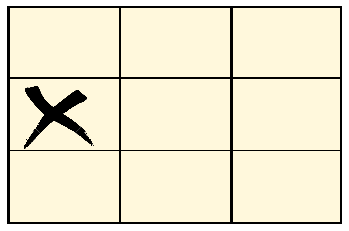

In [7]:
tri = Triqui()
s = tri.estado_inicial
a = choice(tri.acciones(s))
print("Este es el tablero con una X en", a)
s1 = tri.resultado(s, a)
tri.pintar_estado(s1)
print("Juego terminado?:", tri.es_terminal(s1)) # Debe ser False
print("Le corresponde el turno a:", 'O' if tri.a_jugar(s1) == 1 else 'X') # Debe ser O
print("Utilidad:", tri.utilidad(s1, tri.a_jugar(s1))) # Debe ser None

## Algoritmo minimax <a class="anchor" id="minimax"></a>

Debemos ahora definir un programa para el agente que juega triqui. Este programa debe consistir, de manera general, en una función que percibe un tablero de triqui y devuelve una acción. Más concretamente, el agente recibe un estado `s` y devuelve una jugada, en forma de un índice `(x,y)` que representa la casilla en la cual ha de ponerse el símbolo correspondiente (o bien $O$ o bien $X$). 

El algoritmo que utilizaremos para encontrar la mejor jugada se llama *minimax*. Este nombre es muy acertado, toda vez que evoca simultáneamente la confrontación entre los jugadores así como la manera como se representa dicha confrontación. Esto es, un jugador buscará el mínimo y el otro el máximo de la utilidad. Esta es la razón por la cual se definió la función de utilidad de tal manera que un estado en el que gane $O$ valga -1 y uno en que gane $X$ valga 1. El primer jugador será MIN y el segundo MAX.

### Árbol de confrontación

Dado un estado `s`, se define un árbol de confrontación para `s` de la siguiente manera. Se consideran para el jugador que tiene el turno, digamos MAX, todas las acciones `i` que se pueden aplicar, y para cada una de ellas se encuentra el correspondiente estado `s`$_i$. Luego, para cada uno de estos, se consideran para MIN todas las acciones que se pueden aplicar y se encuentran los correspondientes estados. Esta iteración se repite hasta llegar a los estados en los cuales el juego se termina. En estos estados podemos hallar la utilidad y aquí comenzamos a encontrar los valores minimax de todo el arbol. Es decir, hemos construido el árbol de arriba hacia abajo (de la raíz hacia las hojas) siguiendo las acciones posibles. Ahora encontraremos los valores minimax para cada estado yendo de abajo hacia arriba (de las hojas hacia la raíz). Así pues, obtenemos los valores minimax a partir de la utilidad de los estados terminales, por ejemplo:

<img src="imagenes/ejemplo1.png" width="250px">

Suponiendo que estos estados provienen de una acción de las $X$, ellos provienen de estados más arriba en el árbol, como por ejemplo:

<img src="imagenes/ejemplo2.png" width="250px">

Como la acción en dichos estados es de $X$, que es MAX, entonces el valor minimax se obtiene al encontrar el máximo dentro de todas las opciones posibles. Esto no es interesante en este caso, pues sólo hay una acción posible para $X$, el cual determina el valor minimax para dicho estado.

El siguiente nivel hacia arriba es más interesante, pues $O$ (es decir, MIN), tiene varias opciones:

<img src="imagenes/ejemplo3.png" width="260px">

En este caso $O$ tiene dos opciones, cada una reportando un valor minimax. El valor que MIN escogerá es el mínimo entre los dos valores, es decir, 0. Este es el valor minimax de este estado.

Ahora consideremos un nivel más arriba. Juega $X$ (es decir, MAX):

<img src="imagenes/ejemplo4.png" width="550px">

En el estado que vemos más arriba, el jugador de las $X$ es quien tiene el turno, es decir, juega MAX. Él debe seleccionar la opción que le reporte el máximo de los valores minimax de sus hijos. En este caso, debe seleccionar la única opción con valor 0. Observe que si $X$ seleccionara cualquier otra opción (las cuales tienen valor $-1$), entonces MIN ganaría (suponiendo que MIN juega de la mejor manera posible). Esto es, MAX busca la acción cuyo resultado tenga el mayor valor minimax, por lo que decide poner una $X$ en la casilla de abajo a la izquierda para bloquear el triqui de $O$. Esta acción resulta en el estado de la derecha. 


### Pseudo código para minimax

El siguiente es el pseudo código del algoritmo de decisión minimax, el cual genera, mediante una metodología depth-first, el árbol de confrontación para un estado `s` en el cual le corresponde el turno a MAX:

<img src="imagenes/busqueda-minimax.png" width="500px">

**Ejercicio 1:**

Implemente el anterior pseudocódigo para la función `minimax_search`. Compruebe que la respuesta de $X$ para el siguiente tablero debe ser bloquear el triqui de $O$ en la casilla $(0,0)$.

**Respuesta:**

In [8]:
import numpy as np

def minimax_search(juego:Juego, estado):
    jugador = juego.a_jugar(estado)
    valor, movimiento = max_value(juego,estado, jugador)
    return movimiento

def max_value(juego:Juego, estado,jugador):
    if juego.es_terminal(estado):
        return (juego.utilidad(estado,jugador),None)
    v = -inf
    for a in juego.acciones(estado):
        v2,va = min_value(juego,juego.resultado(estado,a),jugador)
        if v2 > v:
            v,movimiento = v2,a
    return (v,movimiento)
    

def min_value(juego:Juego, estado, jugador):
    if juego.es_terminal(estado):
        return (juego.utilidad(estado,jugador), None)
    v = inf
    for a in juego.acciones(estado):
        v2,a2 = max_value(juego,juego.resultado(estado,a), jugador)
        if v2 < v:
            v,movimiento = v2,a
    return v, movimiento

Computador juega en: (0, 0)


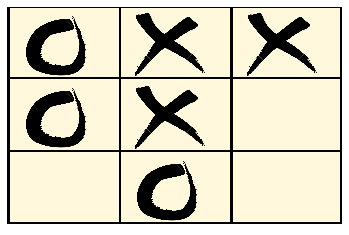

In [9]:
tri = Triqui()
s = tri.estado_inicial
s = tri.resultado(s, (1,1)) # Juega X
s = tri.resultado(s, (0,2)) # Juega O
s = tri.resultado(s, (1,2)) # Juega X
s = tri.resultado(s, (1,0)) # Juega O
s = tri.resultado(s, (2,2)) # Juega X
s = tri.resultado(s, (0,1)) # Juega O
tri.pintar_estado(s)
print("Computador juega en:", minimax_search(tri, s)) 
# La respuesta debe ser (0, 0)

---

**Ejercicio 2:**

Compruebe la correctitud de su algoritmo mediante los siguientes tableros de prueba:

Computador juega en: (0, 0)


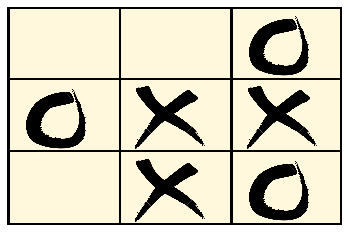

In [10]:
# Primer tablero de prueba
s1 = tri.resultado(tri.estado_inicial, (1,1))  # Juega X
s1 = tri.resultado(s1, (0,1)) # Juega O
s1 = tri.resultado(s1, (2,1)) # Juega X
s1 = tri.resultado(s1, (2,2)) # Juega O
s1 = tri.resultado(s1, (1,0)) # Juega X
s1 = tri.resultado(s1, (2,0)) # Juega O
tri.pintar_estado(s1)
print("Computador juega en:", minimax_search(tri, s1)) 
# La respuesta debe ser (1, 2)

Computador juega en: (0, 0)


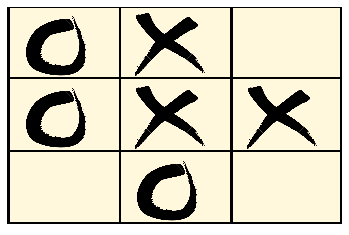

In [11]:
# Segundo tablero de prueba
s1 = tri.resultado(tri.estado_inicial, (2,1)) # Juega X
s1 = tri.resultado(s1, (0,1)) # Juega O
s1 = tri.resultado(s1, (1,2)) # Juega X
s1 = tri.resultado(s1, (1,0)) # Juega O
s1 = tri.resultado(s1, (1,1)) # Juega X
s1 = tri.resultado(s1, (0,2)) # Juega O
tri.pintar_estado(s1)
print("Computador juega en:", minimax_search(tri, s1)) 
# La respuesta debe ser (0, 0)

Computador juega en: (1, 2)


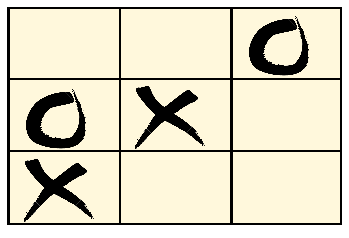

In [12]:
# Tercer tablero de prueba
s1 = tri.resultado(tri.estado_inicial, (1,1)) # Juega X
s1 = tri.resultado(s1, (0,1)) # Juega O
s1 = tri.resultado(s1, (0,0)) # Juega X
s1 = tri.resultado(s1, (2,2)) # Juega O
tri.pintar_estado(s1)
print("Computador juega en:", minimax_search(tri, s1)) 
# La respuesta debe ser (1, 0) o (2, 0)

---

Observe que la clase `Triqui` tiene el método `a_jugar`, el cual recibe un estado `s` y devuelve el jugador al que le corresponde el turno en `s`. La codificación es que si `a_jugar(s)` es 1, le corresponde el turno a $O$; y si es 2, le corresponde el turno a $X$:

In [ ]:
tri = Triqui()
s = tri.estado_inicial
s = tri.resultado(s, (1,1)) # Juega X
s = tri.resultado(s, (0,2)) # Juega O
if tri.a_jugar(s)==2:
    print('Le corresponde el turno a X')
elif tri.a_jugar(s)==1:
    print('Le corresponde el turno a O')    

**Ejercicio 3:**

Adapte la función `minimax_search` para que la decisión que se tome sea sensible al jugador al que le corresponde el turno. De esta manera, si juegan las $X$, se busca maximizar el valor, pero si juegan las $O$, se busca minimizar el valor. Confirme la correctitud de su respuesta con el cuarto tablero de prueba:

**Respuesta:**

In [ ]:
def minimax_search(juego, estado):
    pass

In [ ]:
# Cuarto tablero de prueba
s1 = tri.resultado(tri.estado_inicial, (1,1)) # Juega X
s1 = tri.resultado(s1, (0,0)) # Juega O
s1 = tri.resultado(s1, (2,0)) # Juega X
tri.pintar_estado(s1)
print("Computador juega en:", minimax_search(tri, s1)) 
# La respuesta debe ser (0, 2)

---

### Implementando el engine

¡Ya podemos jugar contra el computador! Intente ganarle al engine que acabamos de construir mediante el análisis minimax:

In [ ]:
# Corra esta celda para comenzar un juego nuevo

from ambientes import Triqui
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt

tri = Triqui()
s = tri.estado_inicial

In [ ]:
# Introduzca aquí su jugada, corra la celda y espere
# la jugada de O. Luego, vuelva a cambiar aquí mismo 
# su jugada y corra la celda de nuevo, etc.
a = (0,2)

assert(a in tri.acciones(s)), 'Acción no permitida. Intente de nuevo.'

###################
s = tri.resultado(s, a)
#clear_output(wait=True)
tri.pintar_estado(s)
plt.show()

# Computador responde
if not tri.es_terminal(s):
    a = minimax_search(tri, s)
    s = tri.resultado(s, a)
    sleep(1)
    clear_output(wait=True)
    tri.pintar_estado(s)
    plt.show()
    if tri.es_terminal(s):
        print('Juego terminado. ¡Gana O!')
else:
    jugador = tri.a_jugar(s)
    if tri.utilidad(s, jugador)==0:
        print('Juego terminado. ¡Empate!')
    else:
        print('Juego terminado. ¡Gana X!')

----

El algoritmo minimax realiza una exploración completa del espacio de estados mediante una metodología depth-first. Si la profundidad máxima del árbol fuera $m$ y en cada estado hubiera $b$ acciones posibles, entonces la complejidad de tiempo del algoritmo es $O(b^m)$. Como se están generando todos los hijos de cada nodo al mismo tiempo, la complejidad de espacio (memoria) es de $O(bm)$.

La complejidad exponencial de este algoritmo lo hace ineficiente para muchos juegos complejos. Una manera de prevenir que el árbol de estados crezca tan rápido es dejando de explorar opciones que no parecen viables. Una de estas alternativas se llama el algoritmo de poda alfa-beta, que veremos a continuación.

## Algoritmo de poda alfa-beta <a class="anchor" id="alfa-beta"></a>

Para explicar el funcionamiento de la poda alfa-beta consideremos un ejemplo más bien simple. Supongamos un juego que define el siguiente árbol, con la utilidad de los estados terminales ya puestos sobre la figura debajo de cada hoja, y los nombres de las acciones posibles etiquetando cada arista:

<img src="imagenes/alfa-beta.png" width="350px">

Este árbol lo hemos puesto para ilustrar el comportamiento del juego. No obstante, es muy importante observar que la idea del algoritmo es evitar tener que construir todo el árbol, deteniendo la exploración del mismo cuando sabemos que una acción no es conveniente para el jugador respectivo. Vamos a ver cómo se logra esto. 

La creación del árbol de confrontación se hace explorando los hijos de cada estado. Durante esta exploración se llevará un registro del valor máximo de las acciones hasta ahora. Este es el valor alfa. También se llevará un registro del valor mínimo (beta). Veamos en nuestro ejemplo para qué llevamos este registro de alfa (el funcionamiento de beta es análogo intercambiando jugadores). 

El algoritmo comienza a explorar el árbol primero en profundidad, inicializado con un valor de alfa de $-\infty$ y de beta de $\infty$. Estamos asumiendo que en la raíz (estado A) le corresponde el turno a MAX:

<img src="imagenes/alfa-beta-1.png" width="350px">

Una vez se obtiene el valor minimax para el primer hijo explorado (en este caso B), se puede asignar un valor a alfa (en este caso, 3):

<img src="imagenes/alfa-beta-2.png" width="350px">

Este valor de alfa se usa en la exploración del siguiente hijo, en este caso el estado C. Esto es, en la expansión de los hijos de C (subexpansiones) se utiliza el valor de alfa = 3. Aquí observamos que la primera subexpansión representa una utilidad de 2, que es inferior a alfa. Este es el criterio para detener la exploración de C.

<img src="imagenes/alfa-beta-3.png" width="350px">

La razón de esta detención debe ser clara. Para establecer el valor minimax del estado C, MIN buscará una opción con mínimo valor minimax. Este valor será menor o igual a 2. Esto permite deducir que en el estado A, MAX no tomará la acción que lo lleve al estado C, toda vez que el valor minimax de una acción ya explorada le reporta un mejor valor (a saber, la acción que lo lleva al estado B). Es por esto que no tiene sentido seguir explorando el estado C y toda esta rama puede podarse. 

### Pseudo código de la poda alfa-beta

El siguiente es el pseudo código para el algoritmo de poda alfa-beta:

<img src="imagenes/poda-alfa-beta.png" width="500px">

**Ejercicio 4:**

Implemente un código python `alpha_beta_search` con la poda alfa-beta. Luego, compare el tiempo de ejecución entre `minimax_search` y `alpha_beta_search` al correr los algoritmos desde la raíz.

**Respuesta:**

In [ ]:
import numpy as np

def alpha_beta_search(juego, estado):
    pass

def max_value_alfa_beta(juego, estado, alfa, beta):
    pass

def min_value_alfa_beta(juego, estado, alfa, beta):
    pass

In [ ]:
%%time
tri = Triqui()
s = tri.estado_inicial
alpha_beta_search(tri, s)

In [ ]:
%%time
tri = Triqui()
s = tri.estado_inicial
minimax_search(tri, s)

Podemos ver que, en este caso, la poda alfa-beta hace que la búsqueda de una decisión sea muy eficiente, comparada a la búsqueda del algoritmo minimax original.

---

**Ejercicio 5:**

Adapte la función `alpha_beta_search` para que la decisión que se tome sea sensible al jugador al que le corresponde el turno.

**Respuesta:**

---

### Engine con poda alfa-beta

Podemos jugar de nuevo el triqui, esta vez con menos demora en la toma de decisiones:

In [ ]:
# Corra esta celda para comenzar un juego nuevo

from ambientes import Triqui
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt

tri = Triqui()
s = tri.estado_inicial

In [ ]:
# Introduzca aquí su jugada, corra la celda y espere
# la jugada de O. Luego, vuelva a cambiar aquí mismo 
# su jugada y corra la celda de nuevo, etc.
a = (1,1)

assert(a in tri.acciones(s)), 'Acción no permitida. Intente de nuevo.'

###################
s = tri.resultado(s, a)
#clear_output(wait=True)
tri.pintar_estado(s)
plt.show()

# Computador responde
if not tri.es_terminal(s):
    a = alpha_beta_search(tri, s)
    s = tri.resultado(s, a)
    sleep(1)
    clear_output(wait=True)
    tri.pintar_estado(s)
    plt.show()
    if tri.es_terminal(s):
        print('Juego terminado. ¡Gana O!')
else:
    jugador = tri.a_jugar(s)
    if tri.utilidad(s, jugador)==0:
        print('Juego terminado. ¡Empate!')
    else:
        print('Juego terminado. ¡Gana X!')

## Funciones de evaluación <a class="anchor" id="feval"></a>

Vamos a ver ahora un ejemplo muy bonito en el que se requiere usar funciones de evaluación para darle un valor a un estado dado. En efecto, observe que los dos algoritmos anteriores atribuyen valor minimax a los estados a partir de la utilidad de los estados terminales. Estos algoritmos toman esta utilidad y la 'suben' por los estados hasta la raíz. Pero, ¿qué pasa si es muy ineficiente llegar hasta el estado final para obtener una utilidad? Esto ocurre en el juego del ajedrez, en donde la explosión de estados es exponencial. Por ejemplo, expandir un tablero tres jugadas hacia adelante implica considerar alrededor de 726 millones de estados.

Para evitar tener que bajar hasta los estados terminales, se puede usar una función `is_cutoff(s)`, la cual utiliza un criterio de detención para la expansión de estados. Esta función reemplazará el criterio `es_terminal` en los algoritmos minimax y poda alfa-beta.

In [ ]:
def is_cutoff(self, board, d):
    if self.es_terminal(board):
        return True
    elif d >= max_lim:
        return True
    else:
        return False

Cuando se 'dispara' la condición `is_cutoff` y el estado no es terminal, debemos retornar un valor. Este valor estará dado por una función de evaluación, que debe aproximar qué tan bueno es un estado. Si el estado es mejor para MAX, la función de evaluación debe retornar valores positivos grandes; si es mejor para MIN, debe retornar valores negativos grandes. Veamos esto en el ejemplo del ajedrez.

### Torre y rey contra rey solitario

Uno de los finales que todo principiante en ajedrez debe aprender es el de hacer mate mediante torre y rey contra rey solitario. Una implementación en python usando la librería [python-chess](https://python-chess.readthedocs.io/en/latest/) es la siguiente. Note que las acciones usan la [notación algebráica estándar](https://es.wikipedia.org/wiki/Notaci%C3%B3n_algebraica).

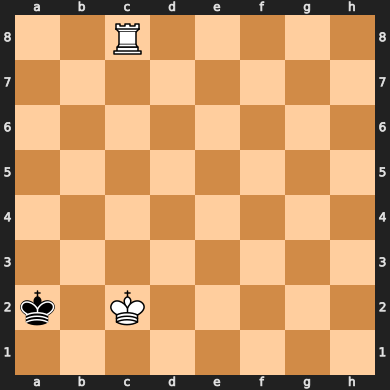

In [3]:
from ambientes import ReyTorreRey
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import re

roo = ReyTorreRey(tablero_inicial=2)
s = roo.estado_inicial
s

# Juegan las negras

En este tablero se puede hacer mate en dos jugadas. El mate se obtiene después de:

1.  ..  Ka3
2. Rc4  Ka2
3. Ra4++

Al introducir cada jugada, usaremos el método `jugada_manual`, en lugar de `resultado`:

Mate? False


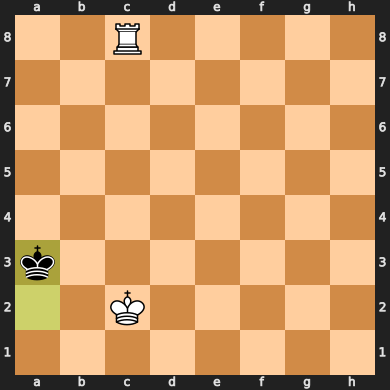

In [4]:
s = roo.jugada_manual(s, 'Ka3')
print('Mate?', roo.es_terminal(s))
s

Mate? False


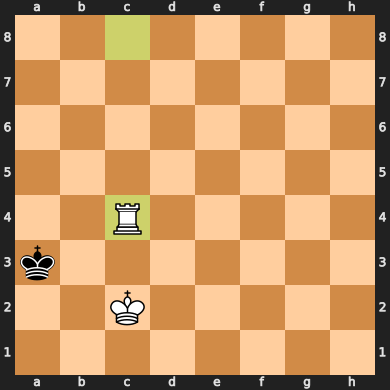

In [6]:
s = roo.jugada_manual(s, 'Rc4')
print('Mate?', roo.es_terminal(s))
s

Mate? False


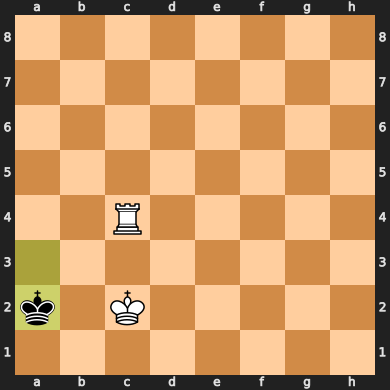

In [7]:
s = roo.jugada_manual(s, 'Ka2')
print('Mate?', roo.es_terminal(s))
s

Mate? True


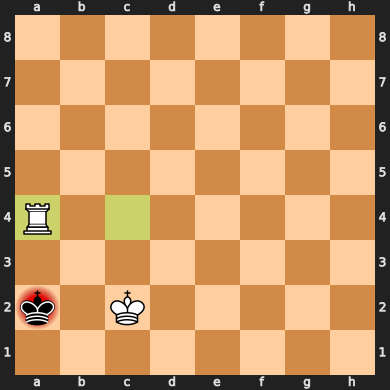

In [8]:
s = roo.jugada_manual(s, 'Ra4')
print('Mate?', roo.es_terminal(s))
s

Observe que, a pesar de que el mate está tan cerca, la creación de un árbol de confrontación mediante la metodología depth-first se quedará atascada en estados en los cuales el rey blanco se aleja progresivamente del rey negro. Para evitar este descenso, usamos el criterio `is_cutoff`, junto con una función de evaluación.

La función de evaluación que proponemos es darle una mejor evaluación a las blancas (MAX) cuanto más arrinconado esté el rey negro. El siguiente tablero muestra el valor de la función de evaluación dependiendo de la casilla en que se encuentre el rey negro:

<img src="imagenes/rincon.png" width="350px">

Por ejemplo, si el rey negro está en e3, la función de evaluación retornará -1.

In [ ]:
def eval(self, board, jugador):
    if self.es_terminal(board):
        return self.utilidad(board, jugador)
    else:
        # Contamos rey negro en borde
        fila, columna = self.casilla_pieza(board, 'k')
        rey_negro_fila = (4 - fila if fila < 4 else (fila % 4) + 1) - 3 
        rey_negro_columna = (4 - columna if columna < 4 else (columna % 4)) - 3
        rincon = max(rey_negro_fila, rey_negro_columna)
        return rincon

In [ ]:
setattr(ReyTorreRey,"eval",eval)
roo = ReyTorreRey(tablero_inicial=3)
s = roo.estado_inicial
s

In [ ]:
roo.eval(s, roo.a_jugar(s))

**Ejercicio 6:**

Sobreviva el ataque de las blancas, las cuales juegan usando la función de evaluación anteriormente descrita.

In [ ]:
def is_cutoff(self, board, d):
    if self.es_terminal(board):
        return True
    elif d >= max_lim:
        return True
    else:
        return False
    
def H_minimax_alfa_beta(problema, board, d, alfa, beta):
    jugador = problema.a_jugar(board)
    if problema.is_cutoff(board, d):
#        print(board)
#        print("valor", problema.eval(board, jugador))
        return problema.eval(board, jugador), None
    elif jugador == 'blancas':
        v = -np.infty
        for a in problema.acciones(board):
            board_resultado = problema.resultado(board, a)
            v2, a2 = H_minimax_alfa_beta(problema, board_resultado, d+1, alfa, beta)
            if v2 > v:
                v = v2
                accion = a
                alfa = max(alfa, v)
            if v >= beta:
                return v, accion
        return v, accion
    elif jugador == 'negras':
        v = np.infty
        for a in problema.acciones(board):
            board_resultado = problema.resultado(board, a)
            v2, a2 = H_minimax_alfa_beta(problema, board_resultado, d+1, alfa, beta)
            if v2 < v:
                v = v2
                accion = a
                beta = min(beta, v)
            if v <= alfa:
                return v, accion
        return v, accion
    else:
        raise NameError("Oops!")            


In [ ]:
from ambientes import ReyTorreRey
from IPython.display import clear_output, display, Image
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import re

###################
# Búsqueda con profundidad limitada
max_lim = 4
setattr(ReyTorreRey,"is_cutoff",is_cutoff)
setattr(ReyTorreRey,"eval",eval)
roo = ReyTorreRey(tablero_inicial=3)
s = roo.estado_inicial


In [ ]:
# Introduzca aquí su jugada y corra la celda
a = 'Kb3'
###################
s = roo.jugada_manual(s, a)
display(s)
if not roo.es_terminal(s):
    v, a = H_minimax_alfa_beta(roo, s, 0, -np.infty, np.infty)
    s = roo.resultado(s, a)
    sleep(1)
    clear_output(wait=True)
    display(s)
    if roo.es_terminal(s):
        print('Juego terminado. ¡Ganan las blancas!')
else:
    jugador = roo.a_jugar(s)
    if roo.utilidad(s, jugador)==0:
        print('Juego terminado. ¡Tablas!')
    else:
        print('Juego terminado. ¡Ganan las negras!')

---

La anterior función de evaluación no es muy buena. La siguiente función considerará una combinación lineal de los siguientes criterios:

* Contar material, para no dejar que el rey negro tome la torre.
* Contar protección de la torre. Cuanto más lejos la torre del rey negro, mejor para las blancas.
* Rey en la orilla, para favorecer tableros en los que el rey negro esté acorralado.
* Favorecer la oposición de los reyes. Para hacer mate, los reyes deben estar en oposición.


In [ ]:
def eval(self, board, jugador):
    if self.es_terminal(board):
        return self.utilidad(board, jugador)
    else:
        th1 = 1
        th2 = 1
        th3 = 10
        th4 = 1
        # Contamos material
        piezas = re.findall(r"[\w]+", str(board))
        dict_material = {'K':9, 'R':5, 'k':-9}
        piezas = [dict_material[p] for p in piezas]
        material = np.sum(piezas)
        # Contamos protección de la torre
        fila_rey_negro, columna_rey_negro = self.casilla_pieza(board, 'k')
        fila_torre, columna_torre = self.casilla_pieza(board, 'R')
        proteccion = (np.abs(fila_rey_negro-fila_torre) + np.abs(columna_rey_negro-columna_torre) + 1)
        # Contamos rey negro en borde
        rey_negro_fila = (4 - fila_rey_negro if fila_rey_negro < 4 else (fila_rey_negro % 4) + 1) - 3 
        rey_negro_columna = (4 - columna_rey_negro if columna_rey_negro < 4 else (columna_rey_negro % 4)) - 3
        rincon = max(rey_negro_fila, rey_negro_columna)
        # Contamos oposición
        fila_rey_blanco, columna_rey_blanco = self.casilla_pieza(board, 'K')
        oposicion = 1./(np.abs(fila_rey_blanco-fila_rey_negro) + np.abs(columna_rey_blanco-columna_rey_negro) + 1)
        return th1*material + th2*proteccion + th3*rincon + th4*oposicion


**Ejercicio 7:**

Ahora trate de sobrevivir el asalto de las blancas, las cuales usan esta función de evaluación repotenciada. La clave es tratar de mantener el rey negro en el centro. ¡Buena suerte!

In [ ]:
from ambientes import ReyTorreRey
from IPython.display import clear_output, display, Image
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import re

###################
# Búsqueda con profundidad limitada
max_lim = 4
setattr(ReyTorreRey,"is_cutoff",is_cutoff)
setattr(ReyTorreRey,"eval",eval)
roo = ReyTorreRey(tablero_inicial=1)
s = roo.estado_inicial

In [ ]:
##### Introduzca aquí su jugada y corra la celda
a = 'Ke5'
###################
s = roo.jugada_manual(s, a)
display(s)
if not roo.es_terminal(s):
    v, a = H_minimax_alfa_beta(roo, s, 0, -np.infty, np.infty)
    s = roo.resultado(s, a)
    sleep(1)
    clear_output(wait=True)
    display(s)
    if roo.es_terminal(s):
        print('Juego terminado. ¡Ganan las blancas!')
else:
    jugador = roo.a_jugar(s)
    if roo.utilidad(s, jugador)==0:
        print('Juego terminado. ¡Tablas!')
    else:
        print('Juego terminado. ¡Ganan las negras!')

---

estetica## En este notebook usted aprendió

* El algoritmo minimax para la toma de decisiones perfecta en un juego competitivo de 2 jugadores.
* El algoritmo de poda alfa beta para eliminar porciones del árbol de confrontación que no influyen en la toma de decisiones.
* Funciones de evaluación para aproximar qué tan buena es una posición para cada jugador.